# 피마 인디언 당뇨병 예측

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv('dataset/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### 모델 정의/설정/학습/평가
- 12/8/1 layer, 200 epochs

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))    # Hidden layer 1
model.add(Dense(8, activation='relu'))                  # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))       # Output layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [16]:
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=0
)

In [18]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.7031
정확도: 0.7031


- 30/1, rmsprop, 100 epochs 

In [19]:
model2 = Sequential()
model2.add(Dense(30, input_shape=(8,), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(
    optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
)

In [22]:
history2 = model2.fit(
    X_train, y_train, validation_split=0.2,
    epochs=100, batch_size=50, verbose=1
)

Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 3.2796 - accuracy: 0.5435 - val_loss: 2.0431 - val_accuracy: 0.6466
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3982 - accuracy: 0.5326 - val_loss: 1.5557 - val_accuracy: 0.6207
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.8423 - accuracy: 0.5457 - val_loss: 1.5717 - val_accuracy: 0.5948
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4389 - accuracy: 0.6043 - val_loss: 1.2323 - val_accuracy: 0.5776
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1841 - accuracy: 0.5935 - val_loss: 1.4274 - val_accuracy: 0.4914
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1335 - accuracy: 0.5848 - val_loss: 0.9808 - val_accuracy: 0.5517
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0003 - accuracy: 0.5957 - val_loss: 0.8003 - val_accuracy: 0.6552
Epoch 8/100


In [23]:
model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 997us/step - loss: 0.8345 - accuracy: 0.6667


[0.8345324397087097, 0.6666666865348816]

- 24/12/8/1 layers, 200 epochs

In [24]:
model3 = Sequential()
model3.add(Dense(24, input_shape=(8,), activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_12 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [25]:
model3.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [26]:
history3 = model3.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.5345
Epoch 2/200
10/10 - 0s - loss: 0.9993 - accuracy: 0.6565 - val_loss: 1.1068 - val_accuracy: 0.5259
Epoch 3/200
10/10 - 0s - loss: 0.9394 - accuracy: 0.6174 - val_loss: 1.0126 - val_accuracy: 0.5690
Epoch 4/200
10/10 - 0s - loss: 0.9048 - accuracy: 0.6326 - val_loss: 0.9632 - val_accuracy: 0.5259
Epoch 5/200
10/10 - 0s - loss: 0.8611 - accuracy: 0.6304 - val_loss: 0.9556 - val_accuracy: 0.5603
Epoch 6/200
10/10 - 0s - loss: 0.8260 - accuracy: 0.6391 - val_loss: 0.9112 - val_accuracy: 0.5517
Epoch 7/200
10/10 - 0s - loss: 0.7981 - accuracy: 0.6413 - val_loss: 0.8877 - val_accuracy: 0.5776
Epoch 8/200
10/10 - 0s - loss: 0.7733 - accuracy: 0.6565 - val_loss: 0.7954 - val_accuracy: 0.5948
Epoch 9/200
10/10 - 0s - loss: 0.7538 - accuracy: 0.6478 - val_loss: 0.8129 - val_accuracy: 0.5948
Epoch 10/200
10/10 - 0s - loss: 0.7186 - accuracy: 0.6587 - val_loss: 0.8486 - val_accuracy: 0.5776
Epoch 11/200
10/10 - 0s - loss: 0.7262 - accuracy: 0.6609 - val_loss: 0.7598 - val_accuracy: 0.5948
E

In [27]:
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.7240


[0.557378351688385, 0.7239583134651184]

### MinMaxScaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, 
    stratify=df.iloc[:,-1].values, random_state=seed
)

In [30]:
model4 = Sequential()
model4.add(Dense(12, input_dim=8, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [31]:
model4.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [32]:
history4 = model4.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

0.6034
Epoch 2/200
10/10 - 0s - loss: 0.6838 - accuracy: 0.6696 - val_loss: 0.6880 - val_accuracy: 0.5862
Epoch 3/200
10/10 - 0s - loss: 0.6798 - accuracy: 0.6717 - val_loss: 0.6871 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6765 - accuracy: 0.6696 - val_loss: 0.6864 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6727 - accuracy: 0.6696 - val_loss: 0.6857 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6698 - accuracy: 0.6674 - val_loss: 0.6851 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6666 - accuracy: 0.6674 - val_loss: 0.6847 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6641 - accuracy: 0.6674 - val_loss: 0.6844 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6609 - accuracy: 0.6674 - val_loss: 0.6842 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6575 - accuracy: 0.6674 - val_loss: 0.6837 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6548 - accuracy: 0.6674 - val_loss: 0.6839 - val_accuracy: 0.5862
E

In [33]:
model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7865


[0.4600425958633423, 0.7864583134651184]

### 시각화

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

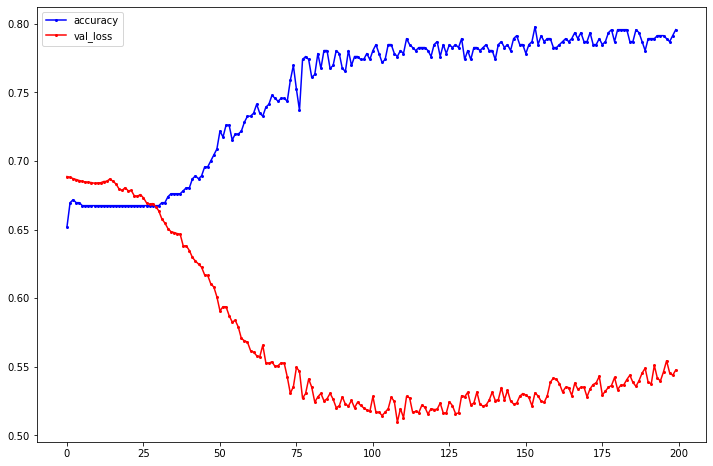

In [36]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()